In [1]:
import numpy as np
import pandas as pd
from netCDF4 import Dataset
import os
import xarray
import pickle
import cartopy.feature as cfeature
import math
import cartopy.crs as ccrs
import scipy
import cartopy
import datetime
from scipy.stats import binned_statistic
from ll_xy import lonlat_to_xy
import matplotlib.pyplot as plt
import kuka_tools as kt

In [2]:
nrcs_ku = pickle.load(open('../../data/pickles/NRCS_830_KU.p','rb'))
nrcs_ka = pickle.load(open('../../data/pickles/NRCS_830_KA.p','rb'))


In [3]:
(start_along_track_ku,end_along_track_ku)=(26.98249594647257, 28.62470650564627)


(start_along_track_ka,end_along_track_ka)=(26.360457731719688, 27.920577169916292)

In [4]:
end_along_track_ku-start_along_track_ku

1.642210559173698

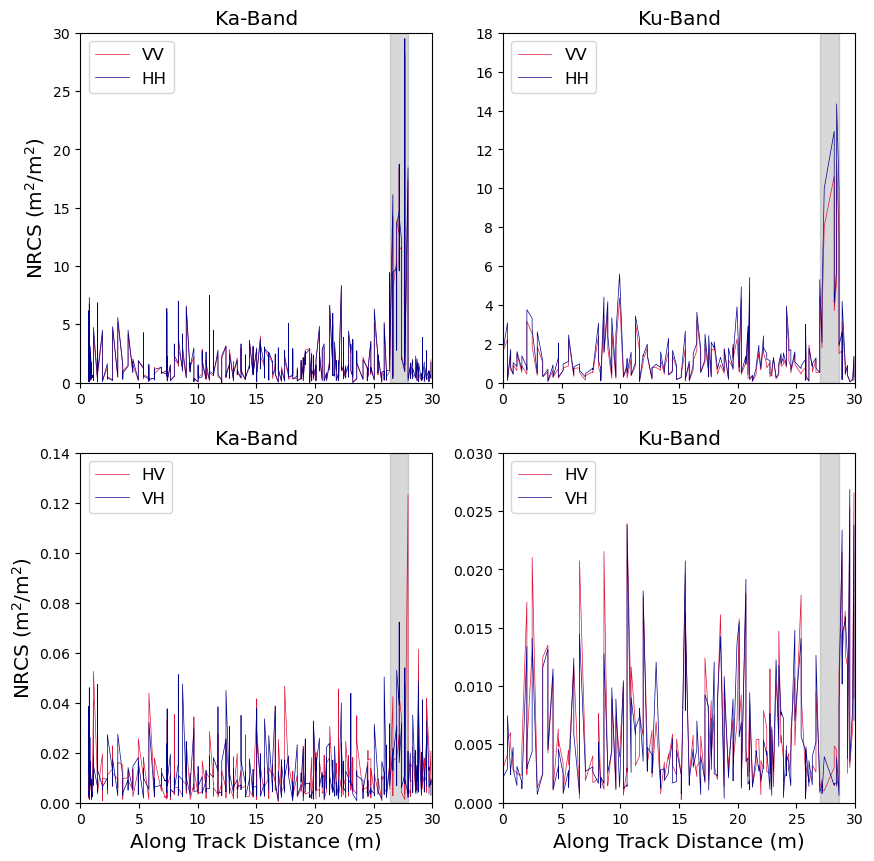

In [7]:
fig,axs=plt.subplots(2,2,figsize=(10,10))

ax1,ax2,ax3,ax4=axs.reshape(-1)

ax1.plot(nrcs_ka['along_track'],
         nrcs_ka['vv'],
         label='VV',
         lw=0.5,
         color='crimson')
ax1.plot(nrcs_ka['along_track'],
         nrcs_ka['hh'],
         label='HH',
         lw=0.5,
         color='darkblue')

ax2.plot(nrcs_ku['along_track'],
         nrcs_ku['vv'],
         label='VV',
         lw=0.5,
         color='crimson')
ax2.plot(nrcs_ku['along_track'],
         nrcs_ku['hh'],
         label='HH',
         lw=0.5,
         color='darkblue')


ax3.plot(nrcs_ka['along_track'],
         nrcs_ka['hv'],
         label='HV',
         lw=0.5,
         color='crimson')
ax3.plot(nrcs_ka['along_track'],
         nrcs_ka['vh'],
         label='VH',
         lw=0.5,
         color='darkblue')

ax4.plot(nrcs_ku['along_track'],
         nrcs_ku['hv'],
         label='HV',
         lw=0.5,
         color='crimson')
ax4.plot(nrcs_ku['along_track'],
         nrcs_ku['vh'],
         label='VH',
         lw=0.5,
         color='darkblue')

for ax in [ax1,ax3]:
    ax.axvspan(start_along_track_ka,
                end_along_track_ka,color='grey',alpha=0.3)   
    ax.set_ylabel('NRCS (m$^2$/m$^2$)',fontsize='x-large')
    ax.set_title('Ka-Band',fontsize='x-large')
    
for ax in [ax3,ax4]:
    ax.set_xlabel('Along Track Distance (m)',fontsize='x-large')
    
for ax in [ax2,ax4]:
    ax.axvspan(start_along_track_ku,
                end_along_track_ku,color='grey',alpha=0.3)    
    ax.set_title('Ku-Band',fontsize='x-large')

ylims=[30,18,0.14,0.03]

for ax,lim in zip(axs.reshape(-1),ylims):
    ax.set_ylim(0,lim)
    ax.legend(fontsize='large')
    ax.set_xlim(0,30)

overleaf_dir = '/home/robbie/Dropbox/Apps/Overleaf/NRCS/figures/'

plt.savefig(f'{overleaf_dir}frost_flowers_all.png',dpi=400,bbox_inches='tight')

plt.show()